<a href="https://colab.research.google.com/github/5x12/ml4everyone/blob/master/Chapter%201.%20Basic%20Principles/cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COST FUNCTION

This Jupyter Notebook is a supplement for Chapter 3. Dimensionality Reduction Techniques of the [Machine Learning For Everyone](ml4everyonebook.com) book.

# 1. Data & Basic Libraries

Let's import basic libraries and the data we have in Section 1.4: **Algorithms and How They Work**.

In [0]:
##https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/
# Basic libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Defined data

x = np.array([30, 46, 60, 65, 77, 95])
y = np.array([31, 30, 80, 49, 70, 118]) #in 100.000

# 2. Building a Regression Model 

Let's now build a simple regression with our data and then visualize it with the graph.

## 2.1. Build & Plot

Building the regression model first:

In [0]:
from sklearn.linear_model import LinearRegression #import Linear Regression model from scikit-learn library

reg = LinearRegression() #define the model
x=x.reshape((-1, 1)) #reshape x
reg = LinearRegression().fit(x, y) #train your model with x-values

Checking estimated coefficient and intercept:

In [6]:
print(' coefficient (parameter a) = {} \n intercept (parameter b) = {}'.format(reg.coef_[0].round(1), 
                                                                               reg.intercept_.round(0)))

 coefficient (parameter a) = 1.3 
 intercept (parameter b) = -18.0


Plotting the regression model:

(0.0, 110.0)

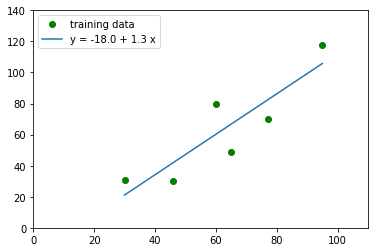

In [9]:
fig, ax = plt.subplots() #define the graph
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, reg.intercept_ + reg.coef_[0]*x, label='y = {} + {} x'.format(reg.intercept_.round(0), reg.coef_[0].round(2))) 
plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## 2.2. Drawing Residuals

Let's draw residuals - the difference between a data point and the model prediction. 

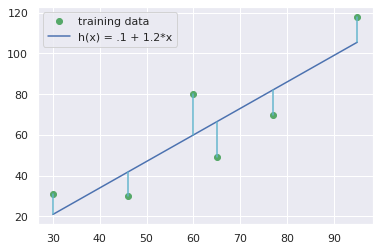

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18.0  + 1.3*x, label='h(x) = .1 + 1.2*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [-18.0  + 1.3*x[i],y[i]], '-', color='c')
plt.legend();

## 2.3. Calculating Sum of Squared Residuals (SSR)

Let's calculate SSR:

In [10]:
# Defining lists

y_pred = [] #defined list with predicted values of y
r = [] #defined list with residuals

#Calculating predicted values of y

for i in x:
    y_pred.append(-18 + 1.3*i)
    
#Calculating residuals
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

#Summing up the residuals

np.sum(r)

1248.1500000000003

## 1.3. Other Regressions

### 1.3.1. Regression 1

(0.0, 110.0)

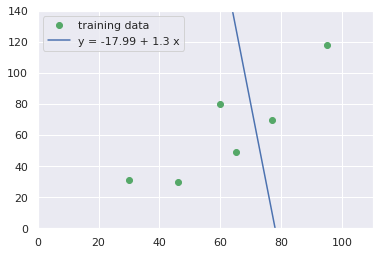

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 780 + -10*x, label='y = {} + {} x'.format(reg.intercept_.round(2), reg.coef_[0].round(2)))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [0]:
##calculating OLS:

y_pred = []
r = []
for i in x:
    y_pred.append(780 + -10*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

388806

### 1.3.2. Regression 2

(0.0, 110.0)

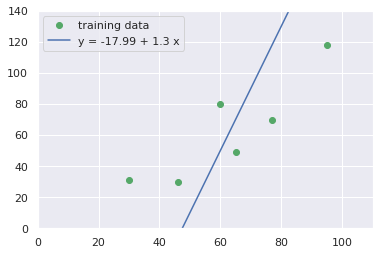

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 4*x-190, label='y = {} + {} x'.format(reg.intercept_.round(2), reg.coef_[0].round(2)))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [0]:
y_pred = []
r = []
for i in x:
    y_pred.append(-190 + 4*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

20326

In [0]:
y

array([ 32,  30,  80,  49,  70, 117])

# 3. Cost Functions

## 3.1. A

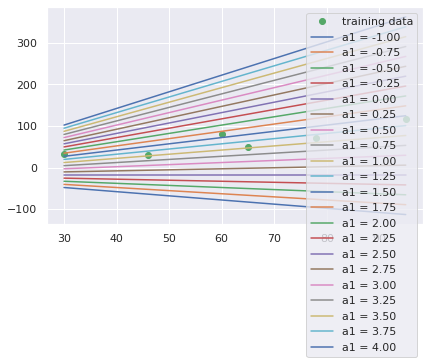

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
a1 = np.linspace(-1,4,21) #coefficient - should be the range -10 +10 from a real one
for i in range(len(a1)):
    ax.plot(x, -18 + a1[i]*x, label='a1 = %.2f' %a1[i] )

plt.legend();

## 3.2. B

In [0]:
# The function J
def J(a0, a1, x, y, m):
    J = 0
    for i in range(m):
        J += ((a0 + a1*x[i]) - y[i] )**2
    return J

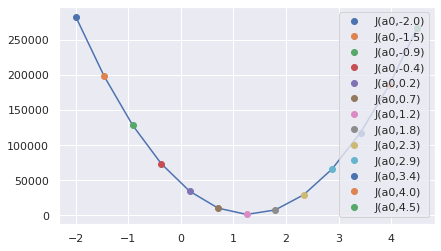

In [0]:
fig, ax = plt.subplots()
a = np.linspace(-2,4.5,13) ## 
a1 = np.linspace(-2,4.5,13) 

ax.plot(a, J(-18,a,x,y,m=len(x)), c='C0')
for i in range(len(a1)):
    ax.plot(a1[i], J(-18,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.1f)' %a1[i])
plt.legend();

## 3.3. C

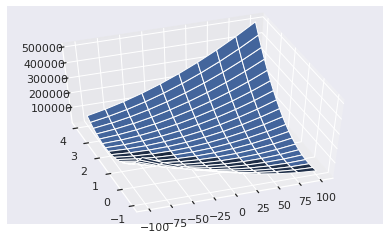

In [0]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-100,100,10)
a1 = np.linspace(-1,4,20)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
ax.view_init(50,-110)

## Other 

### orig

(0.0, 110.0)

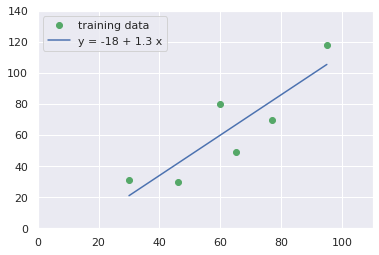

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18 + 1.3*x, label='y = {} + {} x'.format(-18, 1.3))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [0]:
##calculating SSR:

y_pred = []
r = []
for i in x:
    y_pred.append(-18 + 1.3*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

1248.1500000000003

### one

(0.0, 110.0)

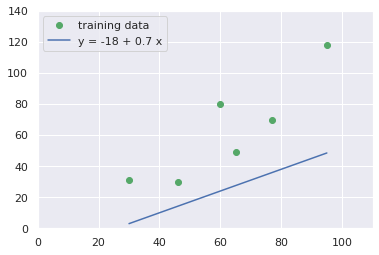

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18 + 0.7*x, label='y = {} + {} x'.format(-18, 0.7))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [0]:
##calculating SSR:

y_pred = []
r = []
for i in x:
    y_pred.append(-18 + 0.7*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

10624.95

### three

(0.0, 110.0)

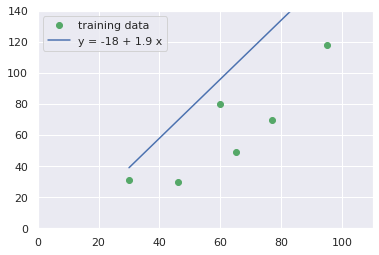

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18 + 1.9*x, label='y = {} + {} x'.format(-18, 1.9))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [0]:
##calculating SSR:

y_pred = []
r = []
for i in x:
    y_pred.append(-18 + 1.9*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

NameError: ignored

## RESTRUCTURED

In [0]:
# some simple random (close to linear) data
x = np.array([30, 46, 60, 65, 77, 95])
y = np.array([31, 30, 80, 49, 70, 118]) #in 100.000

In [0]:
i=0
result_x = []
result_y = []

for i in range(0, len(x)):
  result_x.append((x[i]-np.min(x))/(np.max(x)-np.min(x)))
  result_y.append((y[i]-np.min(y))/(np.max(y)-np.min(y)))

In [0]:
result_x

[0.0,
 0.24615384615384617,
 0.46153846153846156,
 0.5384615384615384,
 0.7230769230769231,
 1.0]

In [0]:
result_x = np.array(result_x)
result_y = np.array(result_y)

result_x=result_x.reshape((-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(result_x, result_y)

In [0]:
print(' parameter a = {} \n parameter b = {}'.format(reg.intercept_.round(2), 
                                                     reg.coef_[0].round(2)))

 parameter a = -0.1 
 parameter b = 0.96


(0.0, 1.0)

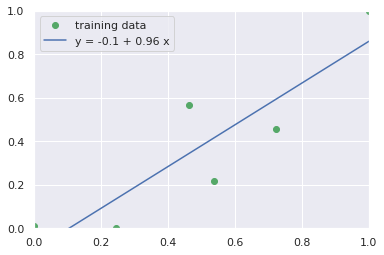

In [0]:
fig, ax = plt.subplots()
ax.plot(result_x,result_y, 'o', color='g', label='training data')
ax.plot(result_x, reg.intercept_.round(2) + reg.coef_[0].round(2)*result_x, label='y = {} + {} x'.format(reg.intercept_.round(2), reg.coef_[0].round(2)))
plt.legend();
plt.ylim(0, 1)
plt.xlim(0, 1)

In [0]:
b=-0.1
a = 0
l=0.1

d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([-5.7])

In [0]:
a_new = d*l
a = a-a_new
a

array([0.57])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.80150769])

In [0]:
a_new = d*l
a = a-a_new
a

array([1.03301538])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

In [0]:
a_new = d*l
a = a-a_new
a

array([0.98956317])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

In [0]:
a_new = d*l
a = a-a_new
a

array([0.97191489])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

In [0]:
a_new = d*l
a = a-a_new
a

array([0.93920945])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

In [0]:
a_new = d*l
a = a-a_new
a

array([0.95146353])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

In [0]:
a_new = d*l
a = a-a_new
a

array([0.95644057])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.95846202])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.95928303])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.02137028])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.02309913])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.02482552])

In [0]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))

a_new = d*l
a = a-a_new
a

array([0.02654948])

# ORIGINAL

In [0]:
# some simple random (close to linear) data
result_x = np.array([30, 46, 60, 65, 77, 95])
result_y = np.array([31, 30, 80, 49, 70, 118]) #in 100.000

In [0]:
result_x=result_x.reshape((-1, 1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(result_x, result_y)

In [8]:
b=-18
a = 2.25
l=0.001

d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([706.5])

In [9]:
a_new = d*l
a_new

array([0.7065])

In [10]:
a = a-a_new
a

array([1.5435])

In [11]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([179.451])

In [12]:
a_new = d*l
a_new

array([0.179451])

In [13]:
a = a-a_new
a

array([1.364049])

In [14]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([45.580554])

In [15]:
a_new = d*l
a_new

array([0.04558055])

In [16]:
a = a-a_new
a

array([1.31846845])

In [17]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([11.57746072])

In [18]:
a_new = d*l
a_new

array([0.01157746])

In [19]:
a = a-a_new
a

array([1.30689099])

In [20]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([2.94067502])

In [21]:
a_new = d*l
a_new

array([0.00294068])

In [22]:
a = a-a_new
a

array([1.30395031])

In [23]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([0.74693146])

In [24]:
a_new = d*l
a_new

array([0.00074693])

In [25]:
a = a-a_new
a

array([1.30320338])

In [26]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([0.18972059])

In [27]:
a_new = d*l
a_new

array([0.00018972])

In [28]:
a = a-a_new
a

array([1.30301366])

In [29]:
d=(-2)*(result_y[0]-(a*result_x[0]+b))+(-2)*(result_y[1]-(a*result_x[1]+b))+(-2)*(result_y[2]-(a*result_x[2]+b))+(-2)*(result_y[3]-(a*result_x[3]+b))+(-2)*(result_y[4]-(a*result_x[4]+b))+(-2)*(result_y[5]-(a*result_x[5]+b))
d

array([0.04818903])

In [30]:
a_new = d*l
a_new

array([4.81890298e-05])